# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [60]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt

In [4]:
base = pd.read_csv('../sinasc_RO_2019.csv')
print(base.shape)
base.head()

(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [9]:
base.loc[((base['APGAR5']>=0) & (base['APGAR5']<=3)), 'cat_APGAR5'] = 'asfixia grave'
base.loc[((base['APGAR5']>=4) & (base['APGAR5']<=5)), 'cat_APGAR5'] = 'asfixia moderada'
base.loc[((base['APGAR5']>=6) & (base['APGAR5']<=7)), 'cat_APGAR5'] = 'asfixia leve'
base.loc[((base['APGAR5']>=8) & (base['APGAR5']<=10)), 'cat_APGAR5'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [81]:
grupos = base['GESTACAO'].value_counts().index
base['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

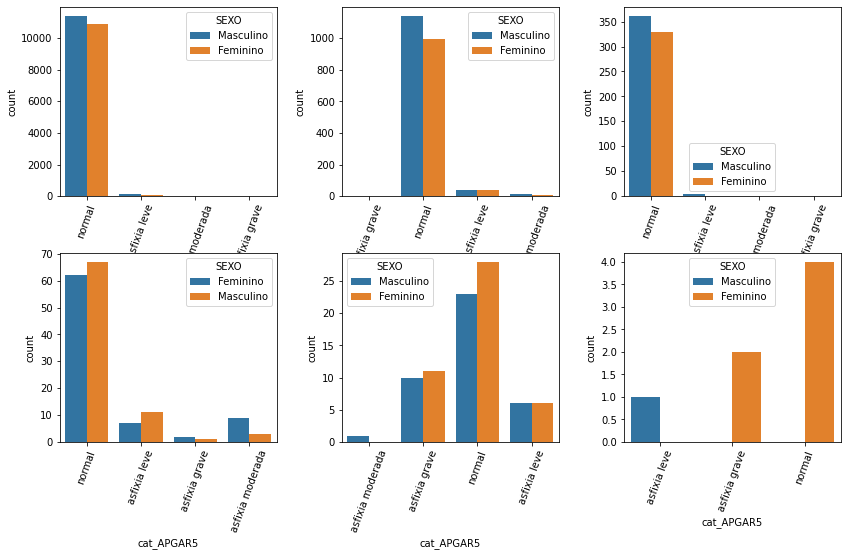

In [86]:
plt.close('all')
plt.rc('figure', figsize=(14, 8))
fig, axes = plt.subplots(2, 3)

srn.countplot(data=base[base['GESTACAO']==grupos[0]], x='cat_APGAR5', hue='SEXO', ax=axes[0,0])
srn.countplot(data=base[base['GESTACAO']==grupos[1]], x='cat_APGAR5', hue='SEXO', ax=axes[0,1])
srn.countplot(data=base[base['GESTACAO']==grupos[2]], x='cat_APGAR5', hue='SEXO', ax=axes[0,2])
srn.countplot(data=base[base['GESTACAO']==grupos[3]], x='cat_APGAR5', hue='SEXO', ax=axes[1,0])
srn.countplot(data=base[base['GESTACAO']==grupos[4]], x='cat_APGAR5', hue='SEXO', ax=axes[1,1])
srn.countplot(data=base[base['GESTACAO']==grupos[5]], x='cat_APGAR5', hue='SEXO', ax=axes[1,2])

axes[0, 0].tick_params(axis="x", rotation = 70)
axes[0, 1].tick_params(axis="x", rotation = 70)
axes[0, 2].tick_params(axis="x", rotation = 70)
axes[1, 0].tick_params(axis="x", rotation = 70)
axes[1, 1].tick_params(axis="x", rotation = 70)
axes[1, 2].tick_params(axis="x", rotation = 70)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [73]:
apgar5_gest = pd.crosstab(base['GESTACAO'], base['cat_APGAR5'])
apgar5_gest

cat_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [89]:
apgar5_gest = apgar5_gest.div(apgar5_gest.sum(axis = 1), axis = 0)
apgar5_gest

cat_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

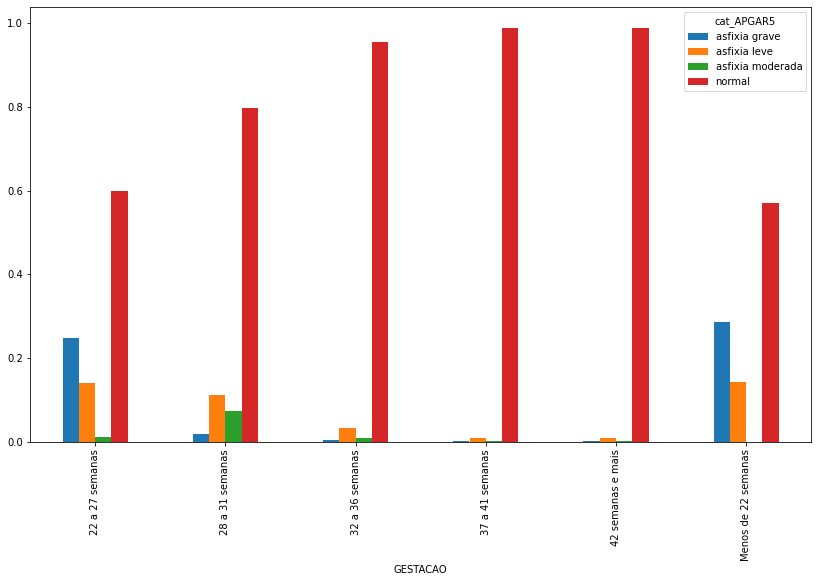

In [87]:
apgar5_gest.plot.bar()

RESPOSTA: Podemos ver que a quantidade de asfixia aumenta inversamente ao número de semanas de gestação, vemos inclusive que temos maior número de casos de asfixia grave (em azul) para gestações de menos de 27 semanas, ou seja, esse conjunto de dados está de acordo com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='PESO', ylabel='Count'>

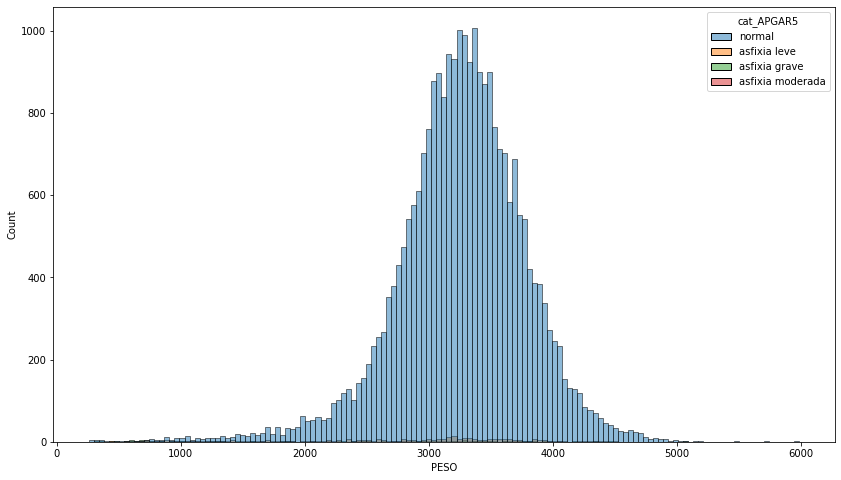

In [93]:
srn.histplot(data=base, 
             x='PESO', 
             hue='cat_APGAR5')

<AxesSubplot:ylabel='Frequency'>

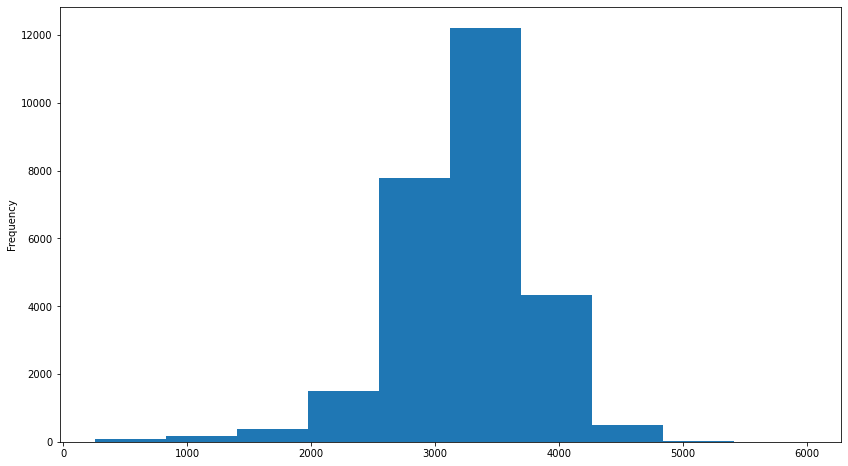

In [106]:
base['PESO'].plot.hist()

In [107]:
base.loc[((base['PESO']>=0) & (base['PESO']<=1500)), 'cat_PESO'] = '0 a 1500'
base.loc[((base['PESO']>=1500) & (base['PESO']<=3000)), 'cat_PESO'] = '1500 a 3000'
base.loc[((base['PESO']>=3000) & (base['PESO']<=4500)), 'cat_PESO'] = '3000 a 4500'
base.loc[((base['PESO']>=4500) & (base['PESO']<=600)), 'cat_PESO'] = '4500 a 6000'

base['cat_PESO'].value_counts()

3000 a 4500    19523
1500 a 3000     7001
0 a 1500         307
Name: cat_PESO, dtype: int64

<AxesSubplot:xlabel='cat_PESO', ylabel='count'>

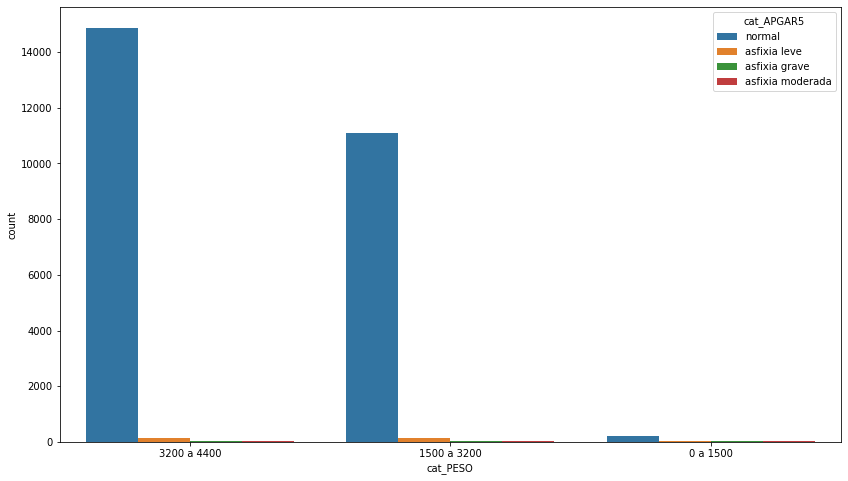

In [103]:
srn.countplot(data=base, 
              x='cat_PESO', 
              hue='cat_APGAR5')

RESPOSTA: há relação, pois podemos ver uma menor ocorrência de APGAR5 normal conforme a diminuição do peso.